# Dorado sensitivity calculator examples

## Imports

In [1]:
from astropy import units as u
from astropy.coordinates import GeocentricTrueEcliptic, get_sun, SkyCoord
from astropy.time import Time
from astropy.visualization import quantity_support
from matplotlib import pyplot as plt
import numpy as np
import synphot
import dorado.sensitivity

## Plot filter efficiency

Note that this is converted from the effective area curve assuming a fiducial collecting area of 100 cm$^2$.

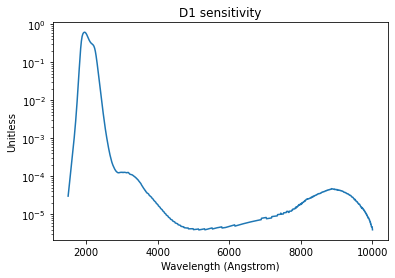

In [2]:
dorado.sensitivity.bandpasses.D1.plot(ylog=True, title='D1 sensitivity')

## Example SNR calculation

This example is for a 10 minute observation of a flat-spectrum 21 AB mag source in "high" zodiacal light conditions (looking in the plane of the ecliptic, but anti-sunward), observing while on the night side of the Earth.

In [3]:
time = Time('2020-10-31 12:33:12')
sun = get_sun(time).transform_to(GeocentricTrueEcliptic(equinox=time))
coord = SkyCoord(sun.lon + 180*u.deg, 0*u.deg, frame=GeocentricTrueEcliptic(equinox=time))
source = synphot.SourceSpectrum(synphot.ConstFlux1D, amplitude=21 * u.ABmag)

dorado.sensitivity.get_snr(source, exptime=10*u.min, coord=coord, time=time, night=True)

4.683422223568606

## Limiting magnitude calculation

Calculate the SNR=5 limiting magnitude as a function of exposure time for a flat-spectrum source at the position of NGC 4993.

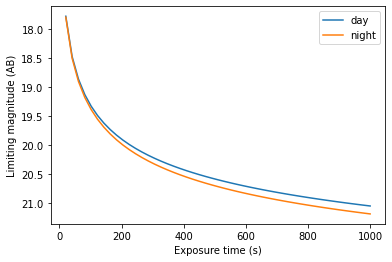

In [4]:
ax = plt.axes()
ax.invert_yaxis()
ax.set_xlabel('Exposure time (s)')
ax.set_ylabel('Limiting magnitude (AB)')

exptimes = np.linspace(0, 1000) * u.s
coord = SkyCoord.from_name('NGC 4993')
time = Time('2017-08-17 17:54:00')

for night in [False, True]:
    limmags = dorado.sensitivity.get_limmag(
        synphot.ConstFlux1D, snr=5, exptime=exptimes, coord=coord, time=time, night=night)
    ax.plot(exptimes, limmags, label='night' if night else 'day')

ax.legend()

## Round trip check

Check that `get_limmag` is the inverse of `get_snr`.

In [5]:
for exptime, limmag in zip(exptimes, limmags):
    print(dorado.sensitivity.get_snr(
        synphot.SourceSpectrum(synphot.ConstFlux1D, amplitude=limmag),
        exptime=exptime, coord=coord, time=time, night=night))

nan
5.000000000000003
5.000000000000003
4.999999999999996
5.000000000000002
5.000000000000002
5.000000000000003
5.000000000000002
5.000000000000001
4.999999999999989
5.0000000000000036
5.000000000000003
5.0
5.000000000000002
5.0
5.000000000000008
5.000000000000008
4.999999999999997
4.999999999999985
5.000000000000001
5.000000000000003
4.9999999999999964
4.999999999999996
5.000000000000004
4.999999999999993
4.999999999999998
5.000000000000001
4.999999999999989
4.999999999999994
4.999999999999994
4.999999999999989
4.999999999999991
4.999999999999999
5.000000000000005
5.000000000000003
4.999999999999992
5.000000000000006
5.0
5.000000000000007
4.999999999999994
4.9999999999999725
4.999999999999992
4.99999999999999
5.000000000000008
4.999999999999994
5.000000000000003
5.000000000000009
4.999999999999994
4.999999999999999
4.9999999999999964
